# Exercise

Suppose you are head of a marketing department. Using the "Mall_Customers" dataset, segment costumers and suggest what promotions should be given to each of the customer segments.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mall_customers = pd.read_csv('Mall_customers.csv')
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

## Standardizing input variables

In [65]:
x = mall_customers.iloc[:,-2:].apply(lambda x : scale(x))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


## How many clusters?

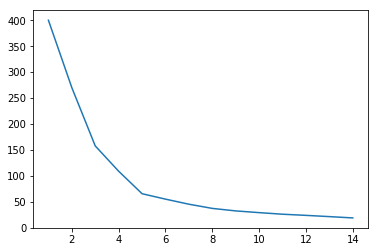

In [45]:
inp = {}
for k in range (1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inp[k] = kmeans.inertia_

plt.plot(inp.keys(),inp.values())

In this example, by looking at our data's scatter plot, we would realize that appropiate number of clusters is 5, but we cannot always visualize our data easily. So based on the elbow method, 3 or 5 clusters should be good.

Text(0, 0.5, 'Spending Score (1-100)')

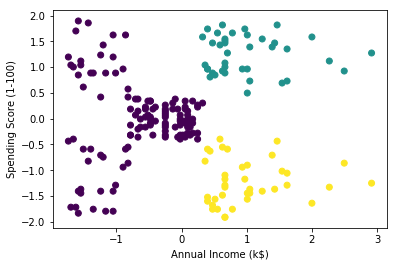

In [51]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=kmeans.labels_)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

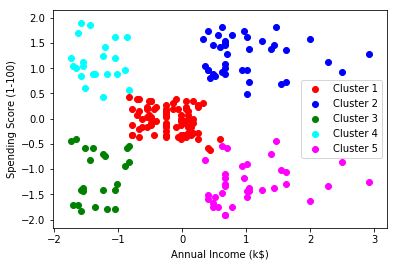

In [67]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
X = x.values
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1] , c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1] , c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1] , c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1] , c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1] , c = 'magenta', label = 'Cluster 5')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Now we segmented customers based on their income and spending score. Keep this in mind: it is not always easy to visualize our clusters, sometimes we need to look at the data in a cluster and based on their common attributes label them. But in this example, we can conclude that:

- Cluster 1: medium income, medium score -> middle income people. It seems they only go shopping usually when they need something, so our promotions should create needs for them

- Cluster 2: high income, high score -> we can offer them exclusive premium products. 

- Cluster 3: low income, low score -> better not to give them any offers :|

- Cluster 4: low income, high score -> they want to spend money on buying, but because their income is low, it's good to give them high discounts

- Cluster 5: high income, low score -> we should encourage them to buy, simply because they are rich.